In [1]:
#IMPORTING LIBRARIES
import sys
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import os
from sklearn import *
from sklearn.metrics import mean_squared_error
from math import sqrt
import math

In [2]:
#READING THE DATASET
Stress=pd.read_csv('stress_dataset.csv')

In [3]:
#DATA ANALYSIS
Stress.shape

(916, 6)

In [4]:
Stress.dtypes

age       int64
sex       int64
bp        int64
hb        int64
temp    float64
num       int64
dtype: object

In [5]:
Stress.head

<bound method NDFrame.head of      age  sex   bp   hb  temp  num
0     57    1  160  108  37.2    2
1     57    1  120  129  37.2    1
2     27    1  130  187  36.1    0
3     31    0  130  172  36.1    0
4     46    1  120  178  36.2    0
5     52    0  140  160  38.3    3
6     47    0  120  163  36.0    0
7     53    1  130  147  37.2    2
8     43    1  140  155  37.2    1
9     47    1  140  148  36.3    0
10    46    0  140  153  36.3    0
11    46    1  130  142  37.2    2
12    34    1  120  173  36.3    0
13    42    1  172  162  36.3    0
14    47    1  150  174  36.3    0
15    38    1  110  168  37.2    1
16    44    1  140  160  36.0    0
17    38    0  130  139  36.0    0
18    39    1  130  171  36.0    0
19    54    1  110  144  36.7    0
20    48    0  150  162  36.0    0
21    48    1  120  160  36.0    1
22    48    1  132  173  38.3    3
23    50    1  130  132  38.3    4
24    40    0  120  158  36.7    0
25    48    0  120  172  36.2    0
26    56    0  150  114  

In [6]:
Stress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 6 columns):
age     916 non-null int64
sex     916 non-null int64
bp      916 non-null int64
hb      916 non-null int64
temp    916 non-null float64
num     916 non-null int64
dtypes: float64(1), int64(5)
memory usage: 43.0 KB


In [7]:
Stress['num'].describe()

count    916.000000
mean       0.996725
std        1.143760
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: num, dtype: float64

In [8]:

#VISUALIZING MISSING VALUES
Stress.isnull().sum()

age     0
sex     0
bp      0
hb      0
temp    0
num     0
dtype: int64

In [9]:
Stress.groupby('num').size()

num
0    409
1    264
2    108
3    107
4     28
dtype: int64

In [10]:
#Printing Independent variables
print("Age    sex     bp    hb    temp")
x= Stress.iloc[:,:-1].values  
print(x)

Age    sex     bp    hb    temp
[[ 57.    1.  160.  108.   37.2]
 [ 57.    1.  120.  129.   37.2]
 [ 27.    1.  130.  187.   36.1]
 ...
 [ 45.    1.  122.  100.   37.2]
 [ 48.    1.  130.  140.   36. ]
 [ 52.    1.  120.   93.   37.2]]


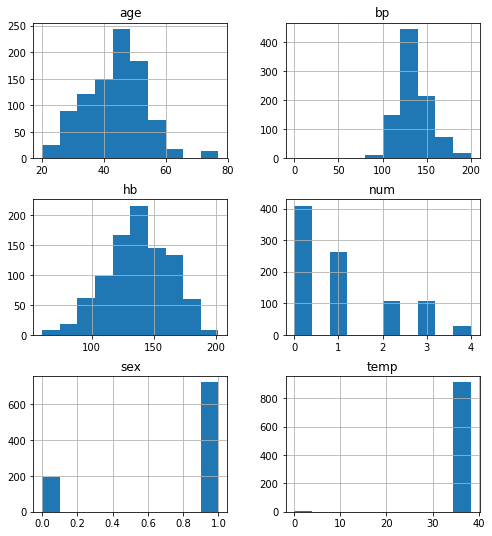

In [11]:
#DATA VISUALIZATION
Stress.hist(figsize = (8,9))
plt.show()
#num = stress level

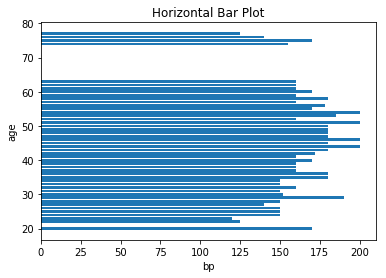

In [12]:
x = Stress.age
y = Stress.bp
plt.barh(x,y)
plt.xlabel("bp")
plt.ylabel('age')
plt.title('Horizontal Bar Plot')
plt.show()

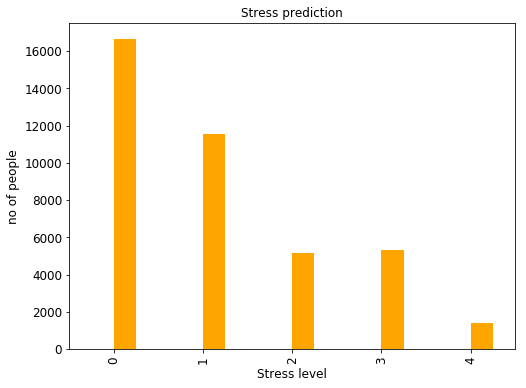

In [13]:
#FINDING NO OF PEOPLE SUFFERING FROM STRESS
# 0-No stress, 1-Very Low, 2-Low, 3-Moderate, 4-High  
ax = Stress[['age','num']].groupby(['num']).sum().reset_index().plot(kind='bar', figsize=(8, 6),
                                       legend = False, title ="Stress prediction", 
                                       color='orange', fontsize=12)
ax.set_xlabel("Stress level", fontsize=12)
ax.set_ylabel("no of people", fontsize=12)
plt.show()

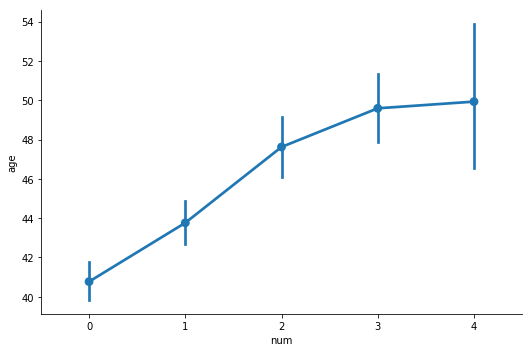

In [14]:
#FINDING RELATIONSHIP BETWEEN AGE AND STRESS ATTRIBUTES
sns.factorplot(x='num',data=Stress,y='age',size=5,aspect=1.5)

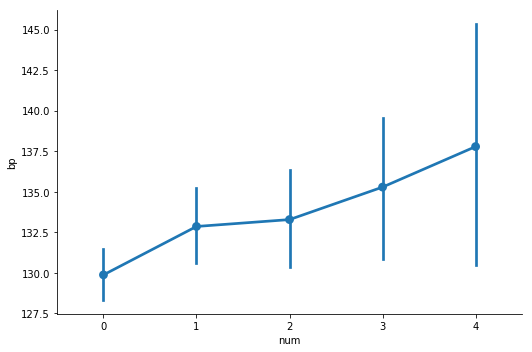

In [15]:
sns.factorplot(x='num',data=Stress,y='bp',size=5,aspect=1.5)

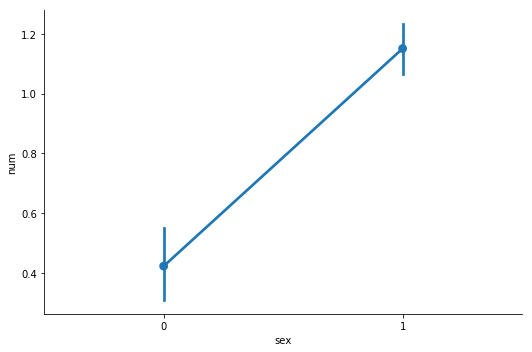

In [16]:
sns.factorplot(x='sex',data=Stress,y='num',size=5,aspect=1.5)

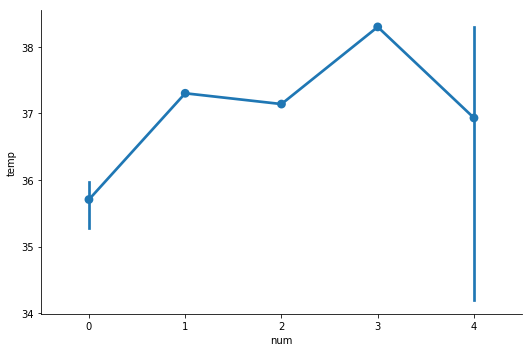

In [17]:
sns.factorplot(x='num',data=Stress,y='temp',size=5,aspect=1.5)

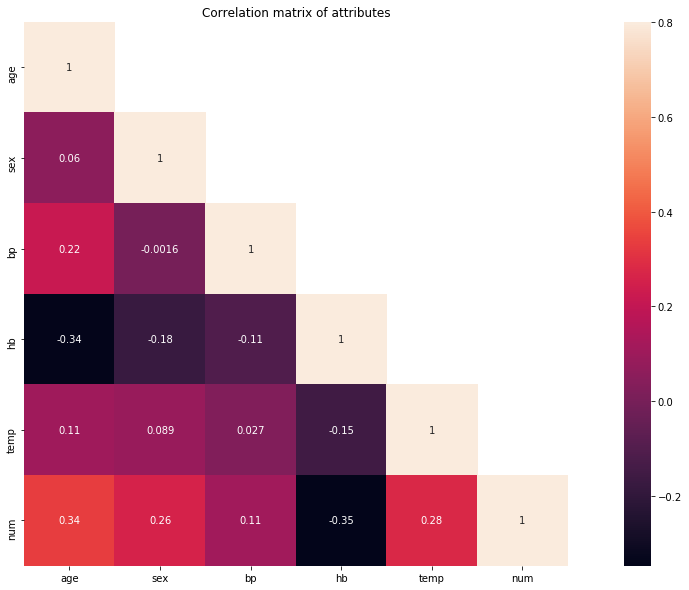

In [18]:
#CORRELATION MATRIX
correMtr=Stress.corr()
mask=np.array(correMtr)
mask[np.tril_indices_from(mask)]=False
fig,ax=plt.subplots(figsize=(20,10))
sns.heatmap(correMtr,mask=mask,vmax=0.8,square=True,annot=True,ax=ax)
ax.set_title('Correlation matrix of attributes')
plt.show()

In [19]:
#Spiltting the data into training and testing data
from sklearn import preprocessing,metrics,linear_model
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split

X_train,X_test,y_train,y_test=train_test_split(Stress.iloc[:,0:-1],Stress.iloc[:,-1],test_size=0.3, random_state=3)


In [20]:
def rmsle(y_pred, y_test) : 
    assert len(y_test) == len(y_pred)
    return np.sqrt(np.mean((np.log(1+y_pred) - np.log(1+y_test))**2))

In [21]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x_train = sc_x.fit_transform(X_train)
x_test = sc_x.transform(X_test)

In [22]:
import pickle
pickle.dump(sc_x, open("scalerX", "wb"))

In [23]:
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [24]:
#LINEAR REGRESSION ALGORITHM
from sklearn import linear_model
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_train = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_test)

In [25]:
#Root Mean Square error
rmse = math.sqrt(metrics.mean_squared_error(y_train,y_pred_train))
print('Root mean square error :',rmse)
#Mean absolute error
mae=metrics.mean_absolute_error(y_test,y_pred_test)
print('Mean absolute error :',mae)

from sklearn.metrics import mean_squared_log_error
from math import sqrt
print('RMSLE :',rmsle(y_pred_test,y_test))

Root mean square error : 0.9852220263783191
Mean absolute error : 0.7941638174238518
RMSLE : 0.47024479680006565


In [26]:
#POLYNOMIAL REGRESSION
Stress_1 = Stress.copy()

X_train,X_test,y_train,y_test=train_test_split(Stress_1.iloc[:,0:-1],Stress_1.iloc[:,-1],test_size=0.3, random_state=42)


from sklearn.preprocessing import PolynomialFeatures
poly_feat = PolynomialFeatures(2)
X_train = poly_feat.fit_transform(X_train)
X_test = poly_feat.fit_transform(X_test)

In [27]:
from sklearn import linear_model
lr_model= linear_model.LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

In [28]:
print("Root Mean squared error : %.2f" 
      % sqrt(mean_squared_error(y_test, y_pred)))
mae=metrics.mean_absolute_error(y_test,y_pred)
print("Mean absolute error : %.2f"%mae)
print("RMSLE : %.2f "%rmsle(y_pred,y_test))

Root Mean squared error : 0.53
Mean absolute error : 0.34
RMSLE : 0.20 


In [29]:
#DECISION TREE
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(min_samples_split=2,max_leaf_nodes=10)

In [30]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=10, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [31]:
dtr_pred=dtr.predict(X_test)
rmse=math.sqrt(metrics.mean_squared_error(y_test,dtr_pred))
mae=metrics.mean_absolute_error(y_test,dtr_pred)
print("Root mean square error : %.2f"%rmse)
print("Mean absolute error : %.2f"%mae)
print("RMSLE : %.2f "%rmsle(dtr_pred,y_test))

Root mean square error : 0.39
Mean absolute error : 0.20
RMSLE : 0.15 


In [32]:
#RANDOM FOREST
Stress1= Stress.copy()
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Stress1.iloc[:,0:-1],Stress1.iloc[:,-1],test_size=0.3, random_state=42)

In [33]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, max_features = 'auto') 
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test) 

In [34]:
print("Root Mean squared error : %.2f"% sqrt(mean_squared_error(y_test, y_pred)))
mae=metrics.mean_absolute_error(y_test,y_pred)
print("Mean absolute error : %.2f"%mae)
print("RMSLE : %.2f "%rmsle(y_pred,y_test))

Root Mean squared error : 0.41
Mean absolute error : 0.21
RMSLE : 0.16 


In [32]:
import joblib
filename = 'model.sav'
joblib.dump(dtr, filename)

['model.sav']

In [33]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.24.2.
